Verteilung der Bruttogrundflächen je Geschoßflächenanzahl in Österreich

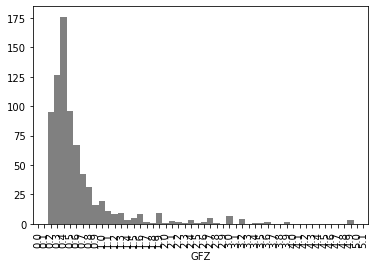

In [1]:
import numpy as np
import pandas as pd
import numpy as np
df = pd.read_excel("gfz_analysis.xlsx", sheet_name="python") # mio m2
df.index = df.GFZ
df = df[df.index < 5.2]
df.BGF.plot(kind="bar", width=1, color="grey")
zw = pd.DataFrame(index=df.index)
peb = pd.DataFrame(index=df.index)

Festlegung der Gebäude-Typologien bzw Klassen hinsichtlich erreichbarer PE-Bilanz

<AxesSubplot:xlabel='GFZ'>

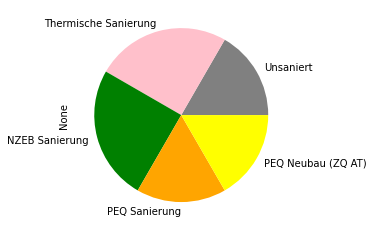

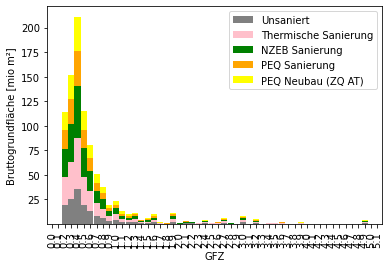

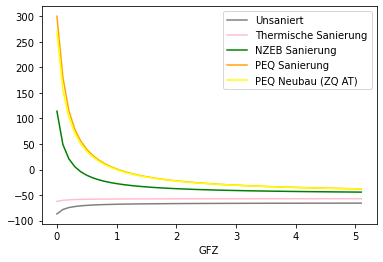

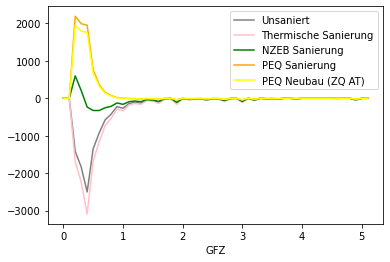

In [2]:
from utils.targets import target, Zielwert, ZQSynergy
from functools import partial


anteile = {
    "Unsaniert": dict(
        anteil=0.2,
        color="grey",
        zw=partial(target,
            A=-2,
            dx=0.15,
            EUI=40,
            cutoff=None,
            scale=1.)
    ),
    "Thermische Sanierung": dict(
        anteil=0.3,
        color="pink",
        zw=partial(target,
            A=-0.5,
            dx=0.15,
            EUI=35,
            cutoff=None,
            scale=1.)
    ),
    "NZEB Sanierung": dict(
        anteil=0.3,
        color="green",
        zw=partial(target,
                   A=15,
                   EUI=30,# gfzscale=0.7
                   )
    ),
    "PEQ Sanierung": dict(
        anteil=0.2,
        color="orange",
        zw=partial(target,
                   EUI=30)
    ),
    "PEQ Neubau (ZQ AT)": dict(
        anteil=0.2,
        color="yellow",
        zw=partial(target,
                   EUI=30,
                   dx=0.18)
    ),
}

colors = [val["color"] for val in anteile.values()]

for key, val in anteile.items():
    df[key] = df.BGF * val["anteil"]
    zw[key] = val["zw"](df.index)
    peb[key] = df[key] * zw[key]

df[anteile].sum().plot(kind="pie", colors=colors)
ax = df[anteile].plot(kind="bar", stacked=True, width=0.95, color=colors)
ax.set_ylabel("Bruttogrundfläche [mio m²]")

zw[anteile].plot(color=colors)
peb.plot(color=colors)

In [3]:
peb["sum"] = peb.sum(axis=1)
sum = peb.sum()
sum # kWh/m2 * mio m² = GWh/a

Unsaniert              -10747.730206
Thermische Sanierung   -13328.046155
NZEB Sanierung          -1816.979909
PEQ Sanierung            7174.101263
PEQ Neubau (ZQ AT)       6371.024602
sum                    -12347.630404
dtype: float64

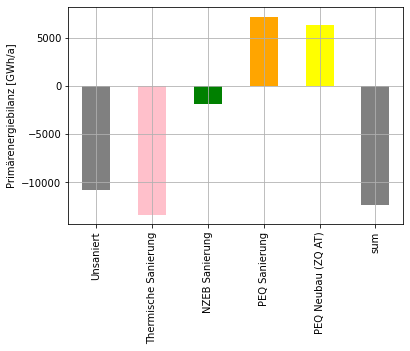

In [4]:
ax = sum.plot(kind="bar", color=colors, grid=True)
ax.set_ylabel("Primärenergiebilanz [GWh/a]")
kum = peb.cumsum(axis=0)

Text(0, 0.5, 'Primärenergiebilanz [GWh/a]')

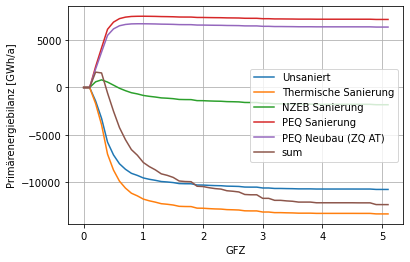

In [5]:
ax = kum.plot(grid=True)
ax.set_ylabel("Primärenergiebilanz [GWh/a]")